# Lab23: Stock price prediction
###   Réalisé par: Jedata Rachid ENSAJ 2025/2026
### Réf: https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# STEP1: DATASET

In [2]:
url = 'dataset/train_dataset.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
dataset_train


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]], shape=(2035, 1))

In [4]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [5]:
# Data transformation
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
print(len(X_train))
print(X_train[0].shape)
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape)

1975
(60,)
(1975, 60)
(1975, 60, 1)


# STEP2 : MODEL

In [6]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error') #1/n * sum(y-ypred)^2 

c:\Users\dell\Desktop\ISIC\DeepLearning\Lab_DeepLearning\jedata_venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# STEP3 : TRAIN

In [7]:
model.fit(X_train,y_train,epochs=10,batch_size=32)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - loss: 0.0106
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0032
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0031
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0028
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0026
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0024
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0022
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0023
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0023
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0017


# STEP4 : TEST

In [8]:
url = 'dataset/test_dataset.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


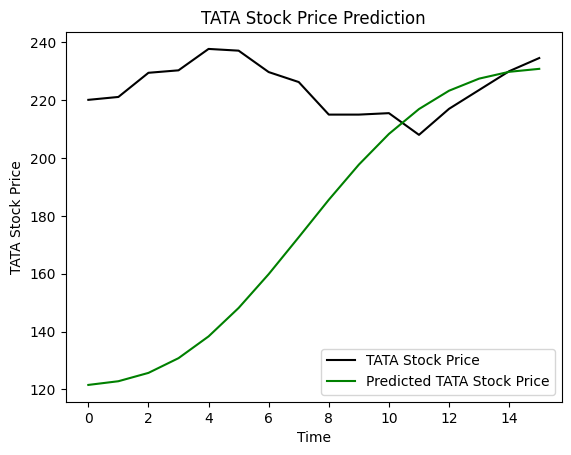

In [9]:
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
#  save the model
model.save('tata_model.h5')
